In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

bike_rentals = pd.read_csv('../data/raw/bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
bike_rentals.select_dtypes(include='number').corrwith(bike_rentals.cnt)

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
dtype: float64

<Axes: >

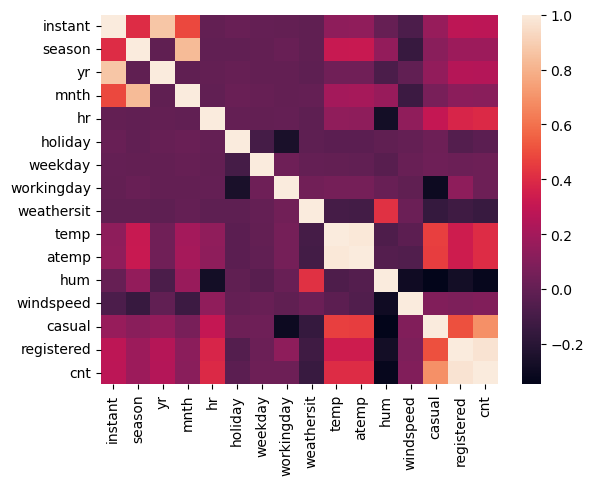

In [10]:
sns.heatmap(bike_rentals.select_dtypes(include='number').corr())

<Axes: xlabel='cnt', ylabel='Density'>

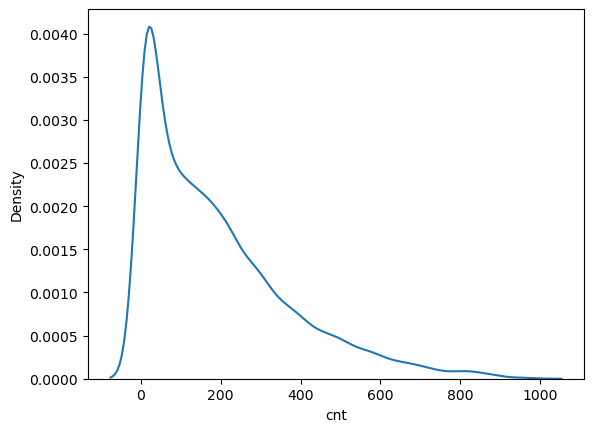

In [3]:
sns.kdeplot(bike_rentals.cnt)

#### Data Preparetion

In [11]:
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

In [13]:
predictors  = bike_rentals.drop(['casual', 'registered', 'cnt', 'dteday'], axis = 1)
target = bike_rentals.cnt

#### Model Selection & Evaluation 

#### Conducting Data Split 

In [15]:
# Train Test Split

from  sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test =  train_test_split( predictors, target, test_size=0.2, random_state=42)


#### Model Selection

In [23]:
#### Using CV to compare different models

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



lin_rg = LinearRegression()
dt_rg = DecisionTreeRegressor(random_state = 42)
rf_rg = RandomForestRegressor(random_state = 42)

# Performing cross_val on each model 

n_folds = 3

lin_rg_scores = - cross_val_score(lin_rg, X_train, Y_train, cv = n_folds, scoring = 'neg_root_mean_squared_error')
dt_rg_scores  = -cross_val_score(dt_rg, X_train, Y_train, cv = n_folds, scoring = 'neg_root_mean_squared_error') 
rf_rg_scores = - cross_val_score(rf_rg, X_train, Y_train, cv = n_folds, scoring = 'neg_root_mean_squared_error')





linear_regression_mean_score = np.mean(lin_rg_scores)
decision_tree_mean_score = np.mean(dt_rg_scores)
random_forest_mean_score = np.mean(rf_rg_scores)


print( 
      {
        "Linear Regression" : linear_regression_mean_score,
        "Decision Tree" : decision_tree_mean_score,
        "Random Forest" : random_forest_mean_score
        } 
      
      )


{'Linear Regression': 132.69772929047232, 'Decision Tree': 60.36380919548122, 'Random Forest': 43.37764012237496}


Selected Model 

Random Foest has the lowest cross_val MSE therefore will be model of choice for this prediction.

#### Model Optimization

Hyperparameter tuning